# Machine Learning Lab01 Feature Selection:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
feature_names = iris.feature_names
X_data = pd.DataFrame(load_iris().data, columns = feature_names)
y_data = load_iris().target

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# implement feature selection library:
from sklearn.feature_selection import f_classif

# 1. f_value:
f_value = f_classif(X_data, y_data)

for feature in zip(feature_names, f_value[0]):
    print(feature)

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


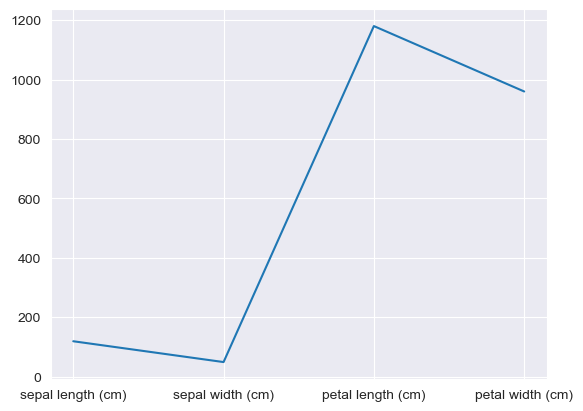

In [8]:
plt.plot(feature_names, f_value[0])
plt.show()

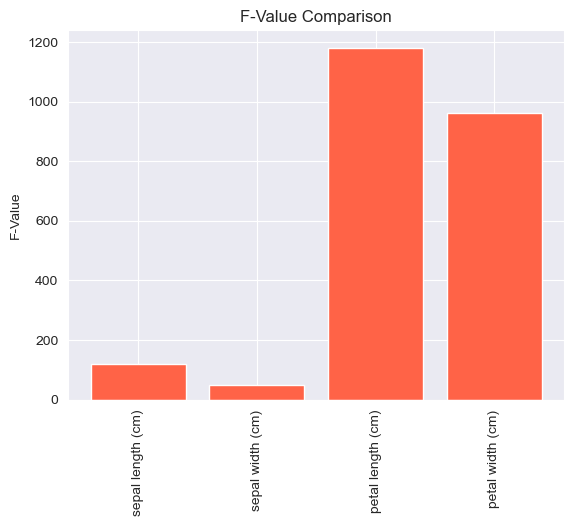

In [9]:
plt.bar(feature_names, f_value[0], color="tomato")
plt.xticks(rotation = "vertical")
plt.ylabel("F-Value")
plt.title("F-Value Comparison")
plt.show()

In [10]:
# 2. Variance Threshold: 
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()

selector.fit_transform(X_data)

for feature in zip(feature_names, selector.variances_):
    print(feature)

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


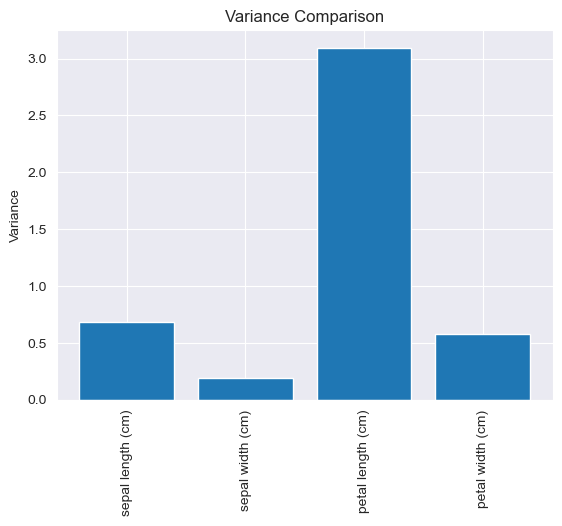

In [11]:
plt.bar(feature_names, selector.variances_)
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

In [12]:
selector = VarianceThreshold(threshold=0.2)
X_data_new = selector.fit_transform(X_data)

print('Number of features before variance thresholding: {}'.format(X_data.shape[1]))

print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


In [15]:
from sklearn.feature_selection import mutual_info_classif

MI_score = mutual_info_classif(X_data, y_data, random_state=0)

for feature in zip(feature_names, MI_score):
    print(feature)

('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


Text(0.5, 1.0, 'Mutual Information Score Comparison')

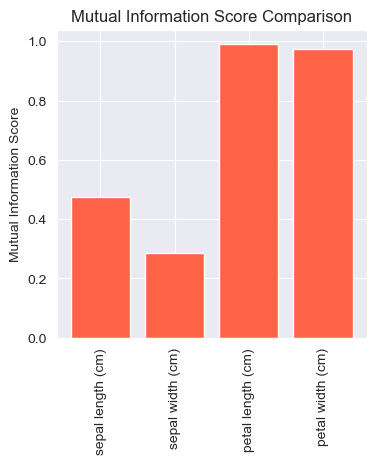

In [16]:
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

In [17]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

In [18]:
# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

Number of features before feature selection: 4
Number of features after feature selection: 2


In [19]:
# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

- petal length (cm)
- petal width (cm)


In [21]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=4,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)



ModuleNotFoundError: No module named 'mlxtend'